In [108]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

[[  0   0   0   0   0   0 255 255 255 255 255 255   0   0   0   0   0   0]
 [  0   0   0   0   0   0 255 255 255 255 255 255   0   0   0   0   0   0]
 [  0   0   0   0   0   0 255 255 255 255 255 255   0   0   0   0   0   0]
 [  0   0   0   0   0   0 255 255 255 255 255 255   0   0   0   0   0   0]
 [  0   0   0   0   0   0 255 255 255 255 255 255   0   0   0   0   0   0]
 [  0   0   0   0   0   0 255 255 255 255 255 255   0   0   0   0   0   0]
 [255 255 255 255 255 255   0   0   0   0   0   0 255 255 255 255 255 255]
 [255 255 255 255 255 255   0   0   0   0   0   0 255 255 255 255 255 255]
 [255 255 255 255 255 255   0   0   0   0   0   0 255 255 255 255 255 255]
 [255 255 255 255 255 255   0   0   0   0   0   0 255 255 255 255 255 255]
 [255 255 255 255 255 255   0   0   0   0   0   0 255 255 255 255 255 255]
 [255 255 255 255 255 255   0   0   0   0   0   0 255 255 255 255 255 255]
 [  0   0   0   0   0   0 255 255 255 255 255 255   0   0   0   0   0   0]
 [  0   0   0   0   0   0

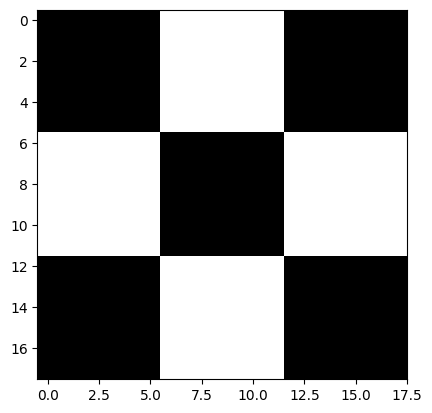

In [109]:
img = cv2.imread('checkerboard_18x18.png', cv2.IMREAD_GRAYSCALE) # Load image in grayscale
print(img)
print(img.shape)  # Print the dimensions of the image
plt.imshow(img, cmap='gray')

In [110]:
print(img[0,0])  # Print the pixel value at the first row and first column
print(img[0,7])  # Print the pixel value at the first row and eighth column

0
255


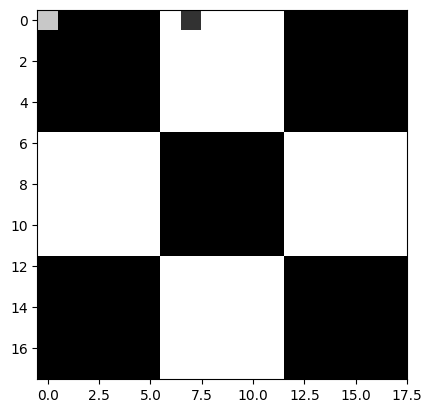

In [111]:
img[0,0] = 200
img[0,7] = 50
plt.imshow(img, cmap='gray')

## changing colores 
the values from 0 to 255 present brightness, not color.
because we have A grayscale image it has no concept of red, green, or blue.
It only stores luminance. to represent colore it must have 3 chaneles (height, width, 3)
By default, OpenCV loads images in BGR = blue, green , red 

In [112]:
img_colored = cv2.imread('checkerboard_18x18.png', cv2.IMREAD_COLOR) # Load image in color
print(img_colored.shape)  # Print the dimensions of the color image
print(img_colored[0,0])  # Print the BGR pixel value at the first row and first column
print(img_colored[0,7])  # Print the BGR pixel value at the first row and eighth column

(18, 18, 3)
[0 0 0]
[255 255 255]


Text(0.5, 1.0, 'Color Image')

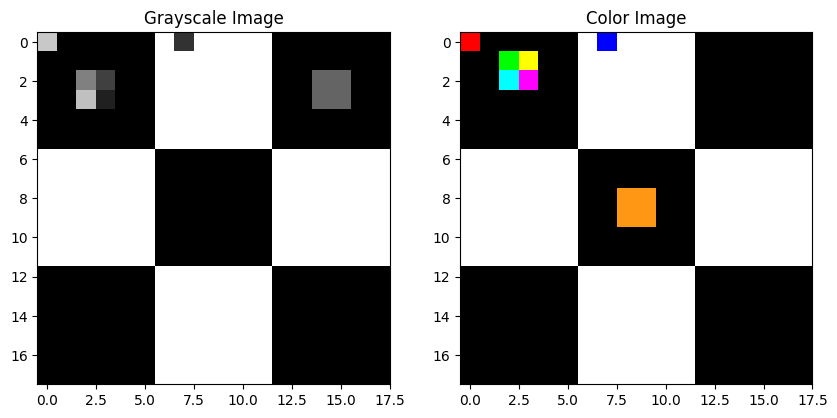

In [116]:
img_colored[0,0] = [255,0,0] # Set pixel to blue in BGR format
img_colored[0,7] = [0,0,255] # Set pixel to red in BGR format
img_colored[1,2] = [0,255,0] # Set pixel to green in BGR format
img_colored[1,3] = [255,255,0]
img_colored[2,2] = [0,255,255]
img_colored[2,3] = [255,0,255]
# ------------------------------------------------------------------------------
img[2,2] = 128
img[2,3] = 64
img[3,2] = 192
img[3,3] = 32
# same as above but using slicing
img[2:4,14:16] = 100 #NumPy slicing uses start:stop, stop is exclusive Rows 2 and 3, Columns 14 and 15
img_colored[8:10,8:10] = [255,150,20]  # Set a 2x2 block to a specific BGR color
# ------------------------------------------------------------------------------
plt.figure(figsize=(10,20))
plt.subplot(1,2,1);plt.imshow(img, cmap='gray');plt.title('Grayscale Image')
plt.subplot(1,2,2);plt.imshow(img_colored);plt.title('Color Image')

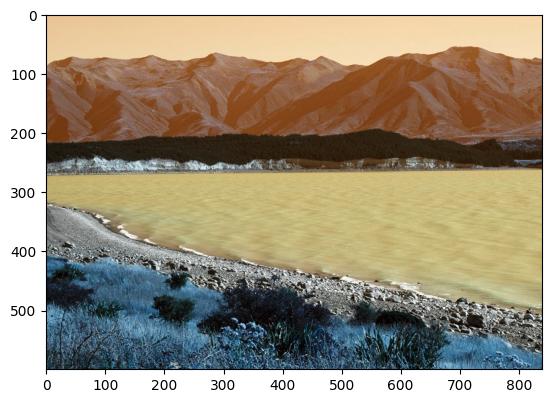

In [ ]:
land = cv2.imread('New_Zealand_Lake.jpg',1)
plt.imshow(land)
# the image appears in BGR format because OpenCV uses BGR by default and matplotlib uses RGB

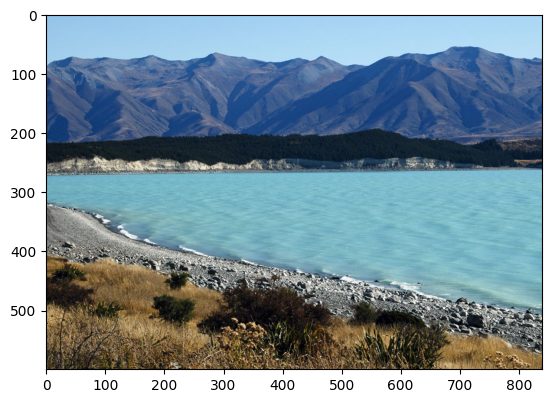

In [130]:
#plt.imshow(cv2.cvtColor(land, cv2.COLOR_BGR2RGB)) # Convert BGR to RGB using OpenCV function
land_rgb = land[:,:,::-1] # Simple way to convert BGR to RGB by reversing the last dimension
plt.imshow(land_rgb)

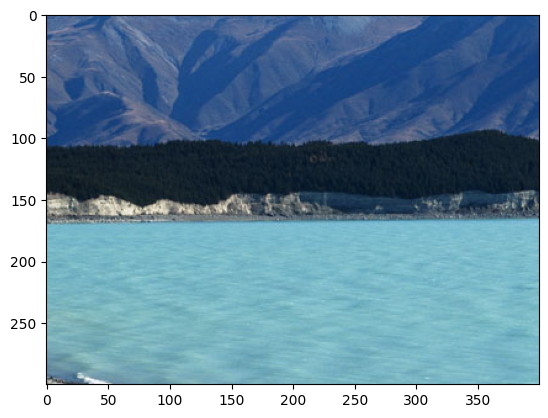

In [125]:
land_rgb_croped = land_rgb[100:400, 200:600]  # Crop the image to rows 100-399 and columns 200-599
plt.imshow(land_rgb_croped)

# Flipping Images


The function **`flip`** flips the array in one of three different ways (row and column indices are 0-based):

### <font style="color:rgb(8,133,37)">Function Syntax </font>
``` python
dst = cv.flip( src, flipCode )
```

`dst`: output array of the same size and type as src.

The function has **2 required arguments**:
    
1. `src`:	input image
2. `flipCode`: a flag to specify how to flip the array; 0 means flipping around the x-axis and positive value (for example, 1) means flipping around y-axis. Negative value (for example, -1) means flipping around both axes.


### <font style="color:rgb(8,133,37)">OpenCV Documentation</font>

**`flip`**: <a href="https://docs.opencv.org/4.5.0/d2/de8/group__core__array.html#gaca7be533e3dac7feb70fc60635adf441" target="_blank">Documentation link</a>

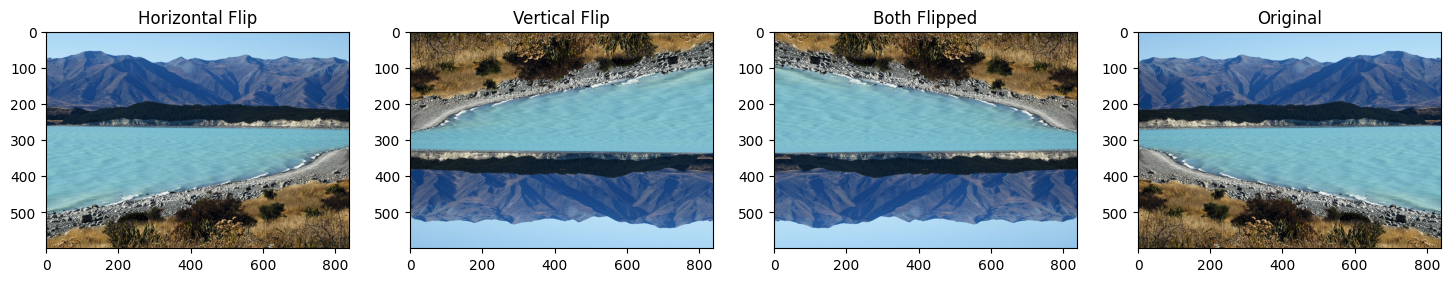

In [126]:
land_rgb_flip_horesontal = cv2.flip(land_rgb, 1)  # Flip the image horizontally
land_rgb_flip_vertical = cv2.flip(land_rgb, 0)    # Flip the image vertically
land_rgb_flip_both = cv2.flip(land_rgb, -1)       # Flip the image both horizontally and vertically
plt.figure(figsize=(18, 5))
plt.subplot(141);plt.imshow(land_rgb_flip_horesontal);plt.title("Horizontal Flip");
plt.subplot(142);plt.imshow(land_rgb_flip_vertical);plt.title("Vertical Flip");
plt.subplot(143);plt.imshow(land_rgb_flip_both);plt.title("Both Flipped");
plt.subplot(144);plt.imshow(land_rgb);plt.title("Original");

## fliping with numply slice
General slicing rule (lock this in)
| Slice          | Meaning                 |
| -------------- | ----------------------- |
| `[::-1]`       | reverse along that axis |
| `[:, ::-1]`    | horizontal flip         |
| `[::-1, :]`    | vertical flip           |
| `[:, :, ::-1]` | reverse channels        |

Text(0.5, 1.0, 'Original')

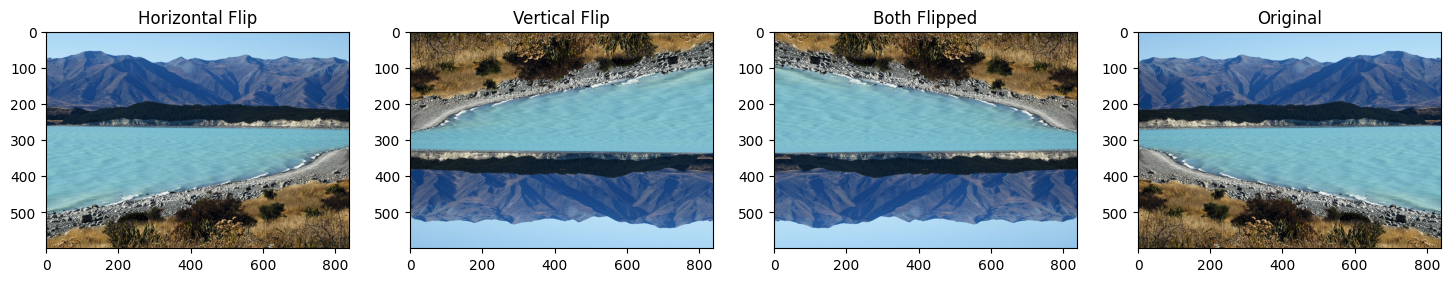

In [131]:
plt.figure(figsize=(18, 5))
plt.subplot(141);plt.imshow(land_rgb[:, ::-1]);plt.title("Horizontal Flip")
plt.subplot(142);plt.imshow(land_rgb[::-1]);plt.title("Vertical Flip")
plt.subplot(143);plt.imshow(land_rgb[::-1, ::-1]);plt.title("Both Flipped")
plt.subplot(144);plt.imshow(land_rgb);plt.title("Original")

# Resizing Images

The function **`resize`** resizes the image `src` down to or up to the specified size. The size and type are derived from the `src`,`dsize`,`fx`, and `fy`.

### <font style="color:rgb(8,133,37)">Function Syntax </font>

``` python
dst = resize( src, dsize[, dst[, fx[, fy[, interpolation]]]] )
```

`dst`: output image; it has the size dsize (when it is non-zero) or the size computed from src.size(), fx, and fy; the type of dst is the same as of src.

The function has **2 required arguments**:
    
1. `src`:	input image

2. `dsize`: output image size  desired size but as None if not wanted 

Optional arguments that are often used include:

1. `fx`: Scale factor along the horizontal axis; when it equals 0, it is computed as (𝚍𝚘𝚞𝚋𝚕𝚎)𝚍𝚜𝚒𝚣𝚎.𝚠𝚒𝚍𝚝𝚑/𝚜𝚛𝚌.𝚌𝚘𝚕𝚜

2. `fy`: Scale factor along the vertical axis; when it equals 0, it is computed as (𝚍𝚘𝚞𝚋𝚕𝚎)𝚍𝚜𝚒𝚣𝚎.𝚑𝚎𝚒𝚐𝚑𝚝/𝚜𝚛𝚌.𝚛𝚘𝚠𝚜

The output image has the size `dsize` (when it is non-zero) or the size computed from `src.size()`, `fx`, and `fy`; the type of dst is the same as of src.

### <font style="color:rgb(8,133,37)">OpenCV Documentation</font>

**`resize()`**: <a href="https://docs.opencv.org/4.5.0/da/d54/group__imgproc__transform.html#ga47a974309e9102f5f08231edc7e7529d" target="_blank">Documentation link</a>

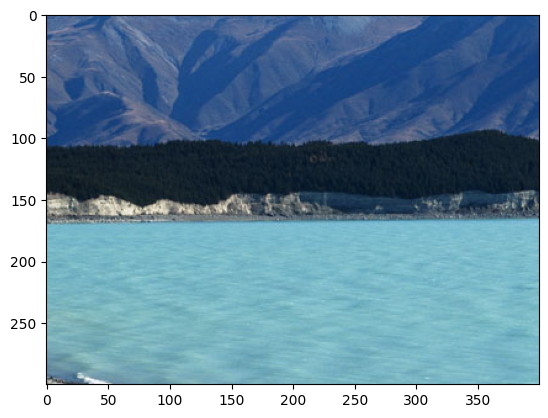

In [132]:
plt.imshow(land_rgb_croped)

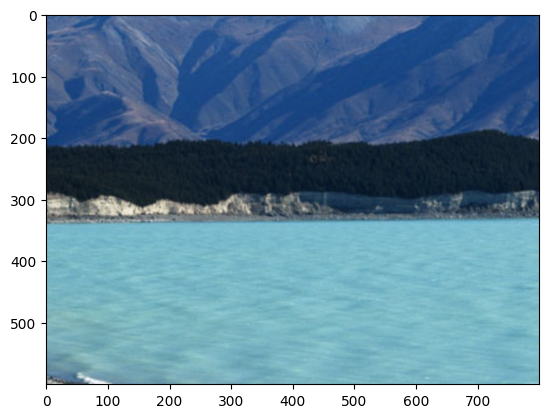

In [ ]:
# Method 1: Specifying Scaling Factor using fx and fy
big = cv2.resize(land_rgb_croped, None, fx=2, fy=2) # Scale image by a factor of 2 x2 in both dimensions
plt.imshow(big)
# we used interpolation method by default which is INTER_LINEAR

How different interpolations behave when enlarging

`INTER_NEAREST`

-Copies the closest pixel
-No averaging
-Result: blocky, pixelated
-Fast, no smoothing

`INTER_LINEAR` (default)

-Bilinear averaging
-Smooth but slightly blurry
-Best general-purpose choice

`INTER_CUBIC`

-Uses 4×4 neighborhood
-Sharper than linear
-Slower
-Good for photos

`INTER_LANCZOS4`

-Highest quality
-Preserves edges best
-Slowest

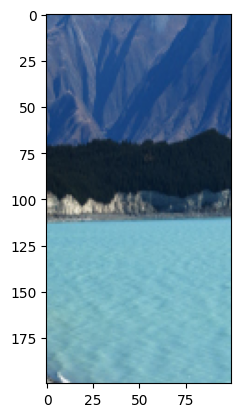

In [ ]:
#Medthod 2: Specifying exact size of the output image, Resize to specific dimensions
desired_width = 100
desired_height = 200
dim = (desired_width, desired_height)

# Resize background image to same size as logo image
resized_cropped_region = cv2.resize(land_rgb_croped, dsize=dim, interpolation=cv2.INTER_AREA)
plt.imshow(resized_cropped_region)